In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Preparation

In [2]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

### Feature Engineering

In [5]:
df = df[df['Country'].isin (['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands','Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy'])]
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['price_total'] = df['Quantity']*df['UnitPrice']

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134541
Country             0
year                0
month               0
price_total         0
dtype: int64

In [7]:
df.duplicated().sum()

5244

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop(['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'InvoiceDate'], axis=1, inplace=True)

In [10]:
df.shape

(530124, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530124 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     530124 non-null  int64  
 1   UnitPrice    530124 non-null  float64
 2   Country      530124 non-null  object 
 3   year         530124 non-null  int64  
 4   month        530124 non-null  int64  
 5   price_total  530124 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 28.3+ MB


In [12]:
df.sample()

,Quantity,UnitPrice,Country,year,month,price_total
521516,1,3.29,United Kingdom,2011,12,3.29


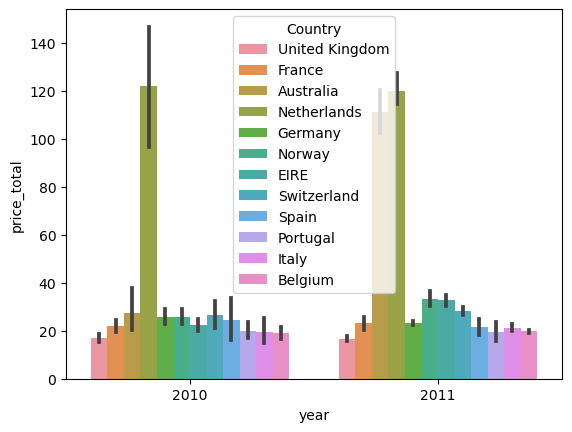

In [13]:
sns.barplot(x='year', y='price_total', hue='Country', data=df);

In [14]:
df = pd.get_dummies(df, columns=["Country"] )

In [15]:
df.sample()

,Quantity,UnitPrice,year,month,price_total,Country_Australia,Country_Belgium,Country_EIRE,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Norway,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
500062,1,1.65,2011,11,1.65,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530124 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Quantity                530124 non-null  int64  
 1   UnitPrice               530124 non-null  float64
 2   year                    530124 non-null  int64  
 3   month                   530124 non-null  int64  
 4   price_total             530124 non-null  float64
 5   Country_Australia       530124 non-null  uint8  
 6   Country_Belgium         530124 non-null  uint8  
 7   Country_EIRE            530124 non-null  uint8  
 8   Country_France          530124 non-null  uint8  
 9   Country_Germany         530124 non-null  uint8  
 10  Country_Italy           530124 non-null  uint8  
 11  Country_Netherlands     530124 non-null  uint8  
 12  Country_Norway          530124 non-null  uint8  
 13  Country_Portugal        530124 non-null  uint8  
 14  Country_Spain       

### PCA

In [17]:
pca = PCA(n_components=6)

In [18]:
df_pca = pca.fit_transform(df)

In [19]:
pca.components_

array([[-4.75150475e-01,  3.01250348e-02, -4.92032091e-07,
        -5.53869231e-07, -8.79388713e-01, -1.35928220e-06,
        -5.13534187e-08, -1.33875106e-06, -5.31796838e-07,
        -5.90386959e-07, -2.38940274e-08, -3.00026248e-06,
        -1.81586219e-07, -2.67134705e-08, -9.69577612e-08,
        -2.38170732e-07,  7.43915516e-06],
       [ 5.68719312e-01,  7.73114897e-01, -3.24992437e-06,
        -5.13136134e-05, -2.80805444e-01,  1.19322956e-06,
        -8.92028122e-08,  2.07494552e-06,  1.20128850e-06,
        -5.34867450e-07, -5.23086591e-08,  4.83140367e-06,
         3.07941307e-07,  8.36581731e-07, -3.41755130e-08,
        -1.78765782e-07, -9.55607008e-06],
       [ 6.71409234e-01, -6.33550185e-01,  2.64181391e-05,
        -1.03767046e-04, -3.84478597e-01,  1.71559943e-06,
         6.95274145e-07, -2.66586149e-06,  8.79838894e-08,
         7.24470925e-07, -2.74209887e-07,  9.50405027e-06,
        -3.34794552e-07, -1.14989049e-06, -7.87380454e-07,
         3.93621903e-07, -7.9

In [20]:
pca.explained_variance_ratio_ 

array([9.15172816e-01, 5.66809757e-02, 2.80848480e-02, 6.03520250e-05,
       3.97953345e-07, 3.04674714e-07])

In [21]:
np.sum([9.15172816e-01, 5.66809757e-02, 2.80848480e-02, 6.03520250e-05,
       3.97953345e-07, 3.04674714e-07])

0.999999694353059

In [22]:
pca.get_feature_names_out() 

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5'], dtype=object)

In [23]:
df = pd.DataFrame(df_pca, columns=pca.get_feature_names_out())

In [24]:
df

,pca0,pca1,pca2,pca3,pca4,pca5
0,3.905801,-2.806549,-0.049371,-4.473171,0.153354,0.783013
1,-0.501013,-3.572392,-2.519325,-4.472871,0.153357,0.782961
2,-2.930379,-3.395884,-1.409269,-4.472995,0.153388,0.782984
3,-0.501013,-3.572392,-2.519325,-4.472871,0.153357,0.782961
4,-0.501013,-3.572392,-2.519325,-4.472871,0.153357,0.782961
...,...,...,...,...,...,...
530119,5.488560,0.723587,7.016995,-4.444567,-1.068924,-0.102842
530120,6.266586,-2.396268,1.273853,-4.443807,-1.069013,-0.102955
530121,3.761089,-3.072043,-2.905657,-4.443335,-1.069041,-0.103046
530122,3.761089,-3.072043,-2.905657,-4.443335,-1.069041,-0.103046


In [25]:
list_of_inirties = []
silhouette_avg = []
for n in range(1, len(df.columns)+1):
    km = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit_predict(df)
    list_of_inirties.append(km.inertia_)
    
    

In [26]:
list_of_inirties

[108343251932.90112,
 66113520063.59503,
 23907611477.789658,
 18687211266.776604,
 14497660107.754492,
 10308108948.733904]

### Elbow

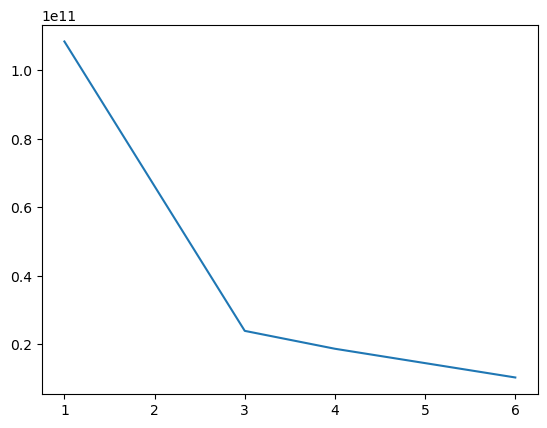

In [27]:
plt.plot(range(1, len(df.columns)+1), list_of_inirties);

### K-means Clustering

In [ ]:
km = KMeans(n_clusters=3, init = 'k-means++', random_state = 42)
df_predict = km.fit_predict(df)
print(f'Silhouette Score(n=3): {silhouette_score(df, df_predict)}')

In [ ]:
df['cluster'] = df_predict

In [ ]:
df['cluster'].value_counts()

In [141]:
df.sample()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,cluster
7252,-5.079002,-4.013304,0.794999,0.557305,-0.060411,-0.023926,3.233013e-17,1


<Axes: xlabel='pca0', ylabel='pca3'>

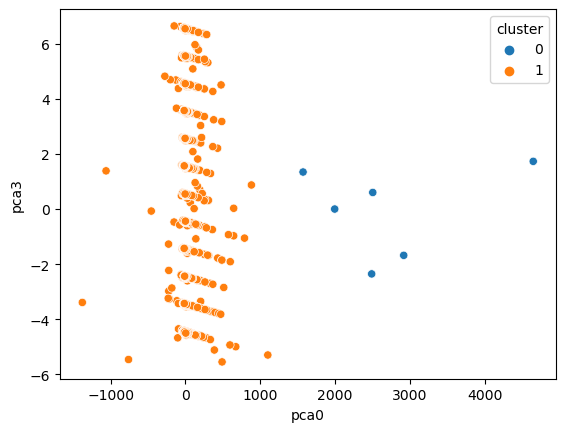

In [142]:
sns.scatterplot(x='pca0', y ='pca3', hue='cluster', data=df)

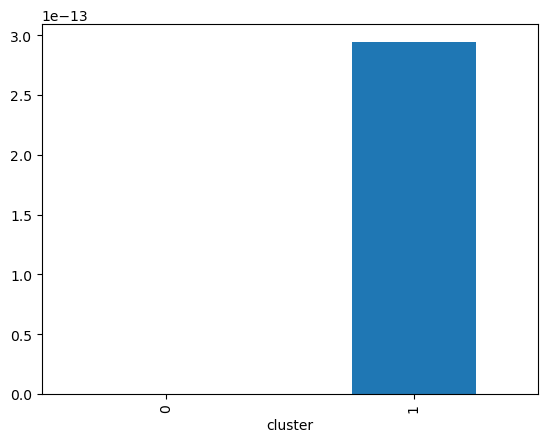

In [145]:
df.groupby('cluster')['pca6'].sum().plot(kind='bar');

###  Evaluation 

In [147]:
print(f'Silhouette Score(n=2): {silhouette_score(df, df_predict)}')

Silhouette Score(n=2): 0.9887350650440587


### Personalization and Recommendations

1- It is recommended to increase the quantities of products in stores in countries that consume the most products, such as Netherlands, Germany, France, and the United Kingdom.

2- It is recommended to improve the promotion of more products in areas where purchasing is weak

3- Sending an email to customers to inform them of the latest offers

### Interpretation and Insights

1 - We advise customers in the lower clustering to provide them with more services and distribute the shops more widely

2 - We recommend offering coupons to those with the largest clustering, thus increasing purchases